In [1]:
from py_stringsimjoin.sampler.sample import sample_pairs
from py_stringsimjoin.feature.autofeaturegen import get_features
from py_stringsimjoin.feature.extractfeatures import extract_feature_vecs
from py_stringsimjoin.active_learner.active_learner import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import graphviz

In [14]:
#ldf=pd.read_csv('/scratch/songs/msd_reduced.csv').head(10000)
#rdf=pd.read_csv('/scratch/songs/msd_reduced.csv').head(10000)
ldf=pd.read_csv('/scratch/products_data/walmart_clean.csv')
rdf=pd.read_csv('/scratch/products_data/amazon_clean.csv')

In [36]:
rdf.head()['proddescrlong']

0    The pocket-size Koss 3-Band Equalizer delivers high-fidelity performance and output normally res...
1                                        Kodak Black Ink Cartridge 10B is a standard black ink cartridge
2                                                  1GB - 333MHz DDR333 PC2700 - DDR SDRAM - 184-pin DIMM
3    KINAMAX MS-UES2 Mini High Precision USB 3-Button 3D Optical Scroll Wheel Mouse with Retractable ...
4                                                                    Wireless MOUSE FOR NETBOOKS USBWRLS
Name: proddescrlong, dtype: object

In [15]:
c=sample_pairs(ldf,rdf,'custom_id','custom_id','longdescr','proddescrlong',500000, 100)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:13


In [16]:
ft = get_features()
fvs = extract_feature_vecs(c, 'l_custom_id','r_custom_id',ldf,rdf,'custom_id','custom_id','longdescr','proddescrlong',ft,n_jobs=4)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:03:09


In [46]:
fvs.head()
fvs[fvs['jaccard_ws']==0.97402597402597402]


,_id,l_custom_id,r_custom_id,jaccard_ws,cosine_ws,dice_ws,overlap_ws,overlap_coefficient_ws
48633,48633,167,19012,0.974026,0.986842,0.986842,75,0.986842
48667,48667,853,19012,0.974026,0.986842,0.986842,75,0.986842
48670,48670,2431,19012,0.974026,0.986842,0.986842,75,0.986842
48674,48674,2472,19012,0.974026,0.986842,0.986842,75,0.986842
15532,140532,167,8787,0.974026,0.986842,0.986842,75,0.986842
15564,140564,853,8787,0.974026,0.986842,0.986842,75,0.986842
15567,140567,2431,8787,0.974026,0.986842,0.986842,75,0.986842
15575,140575,2472,8787,0.974026,0.986842,0.986842,75,0.986842
123533,248533,167,14681,0.974026,0.986842,0.986842,75,0.986842
123562,248562,853,14681,0.974026,0.986842,0.986842,75,0.986842


In [47]:
rf=RandomForestClassifier(10)
al=ActiveLearner(rf, 20, 20, '/scratch/products_data/productsGold.csv')
labels = (fvs['l_custom_id'].astype(str) + ',' +  fvs['r_custom_id'].astype(str)).apply(lambda val: al.gold_pairs.get(val, 0))

147

In [40]:
al.learn(fvs, '_id', 'l_custom_id','r_custom_id')

Selecting next batch...
Iteration : 1
Selecting next batch...
Iteration : 2
Selecting next batch...
Iteration : 3
Selecting next batch...
Iteration : 4
Selecting next batch...
Iteration : 5
Selecting next batch...
Iteration : 6
Selecting next batch...
Iteration : 7
Selecting next batch...
Iteration : 8
Selecting next batch...
Iteration : 9
Selecting next batch...
Iteration : 10
Selecting next batch...
Iteration : 11
Selecting next batch...
Iteration : 12
Selecting next batch...
Iteration : 13
Selecting next batch...
Iteration : 14
Selecting next batch...
Iteration : 15
Selecting next batch...
Iteration : 16
Selecting next batch...
Iteration : 17
Selecting next batch...
Iteration : 18
Selecting next batch...
Iteration : 19
Selecting next batch...
Iteration : 20


In [43]:
al.matcher.classes_

array([0])

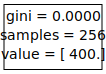

In [42]:
feature_attrs=['jaccard_ws', 'cosine_ws', 'dice_ws', 'overlap_ws', 'overlap_coefficient_ws']
export_graphviz(al.matcher.estimators_[2], out_file="mytree.dot", feature_names=feature_attrs)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
